In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\Admin\Downloads\GroceryStoreDataSet (1).csv", names=['products'])

In [3]:
df = data

In [4]:
data

,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"
5,"BREAD,TEA,BOURNVITA"
6,"MAGGI,TEA,CORNFLAKES"
7,"MAGGI,BREAD,TEA,BISCUIT"
8,"JAM,MAGGI,BREAD,TEA"
9,"BREAD,MILK"


In [5]:
data.columns

Index(['products'], dtype='object')

In [6]:
data.values

array([['MILK,BREAD,BISCUIT'],
       ['BREAD,MILK,BISCUIT,CORNFLAKES'],
       ['BREAD,TEA,BOURNVITA'],
       ['JAM,MAGGI,BREAD,MILK'],
       ['MAGGI,TEA,BISCUIT'],
       ['BREAD,TEA,BOURNVITA'],
       ['MAGGI,TEA,CORNFLAKES'],
       ['MAGGI,BREAD,TEA,BISCUIT'],
       ['JAM,MAGGI,BREAD,TEA'],
       ['BREAD,MILK'],
       ['COFFEE,COCK,BISCUIT,CORNFLAKES'],
       ['COFFEE,COCK,BISCUIT,CORNFLAKES'],
       ['COFFEE,SUGER,BOURNVITA'],
       ['BREAD,COFFEE,COCK'],
       ['BREAD,SUGER,BISCUIT'],
       ['COFFEE,SUGER,CORNFLAKES'],
       ['BREAD,SUGER,BOURNVITA'],
       ['BREAD,COFFEE,SUGER'],
       ['BREAD,COFFEE,SUGER'],
       ['TEA,MILK,COFFEE,CORNFLAKES']], dtype=object)

In [7]:
data = list(df["products"].apply(lambda x:x.split(',')))
data

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [8]:
from mlxtend.preprocessing import TransactionEncoder

In [9]:
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data, columns = te.columns_)
df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True
5,False,True,True,False,False,False,False,False,False,False,True
6,False,False,False,False,False,True,False,True,False,False,True
7,True,False,True,False,False,False,False,True,False,False,True
8,False,False,True,False,False,False,True,True,False,False,True
9,False,False,True,False,False,False,False,False,True,False,False


In [10]:
from mlxtend.frequent_patterns import apriori

In [11]:
df1 = apriori(df, min_support = 0.1 ,use_colnames = True)
df1

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.15,(COCK)
4,0.40,(COFFEE)
5,0.30,(CORNFLAKES)
6,0.10,(JAM)
7,0.25,(MAGGI)
8,0.25,(MILK)
9,0.30,(SUGER)


In [12]:
df1.sort_values(by = "support", ascending = False)

,support,itemsets
2,0.65,(BREAD)
4,0.40,(COFFEE)
0,0.35,(BISCUIT)
10,0.35,(TEA)
5,0.30,(CORNFLAKES)
9,0.30,(SUGER)
7,0.25,(MAGGI)
8,0.25,(MILK)
30,0.20,"(COFFEE, SUGER)"
34,0.20,"(MAGGI, TEA)"


In [13]:
df1['length'] = df1['itemsets'].apply(lambda x:len(x))
df1

,support,itemsets,length
0,0.35,(BISCUIT),1
1,0.20,(BOURNVITA),1
2,0.65,(BREAD),1
3,0.15,(COCK),1
4,0.40,(COFFEE),1
5,0.30,(CORNFLAKES),1
6,0.10,(JAM),1
7,0.25,(MAGGI),1
8,0.25,(MILK),1
9,0.30,(SUGER),1


In [14]:
df1[(df1['length'] == 2) & (df1['support'] > 0.05)]

,support,itemsets,length
11,0.20,"(BISCUIT, BREAD)",2
12,0.10,"(BISCUIT, COCK)",2
13,0.10,"(BISCUIT, COFFEE)",2
14,0.15,"(CORNFLAKES, BISCUIT)",2
15,0.10,"(MAGGI, BISCUIT)",2
16,0.10,"(BISCUIT, MILK)",2
17,0.10,"(BISCUIT, TEA)",2
18,0.15,"(BOURNVITA, BREAD)",2
19,0.10,"(BOURNVITA, SUGER)",2
20,0.10,"(BOURNVITA, TEA)",2


<function matplotlib.pyplot.show(close=None, block=None)>

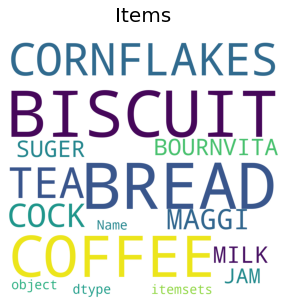

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] =(12,5)
wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200, max_words = 121 ).generate(str(df1['itemsets']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items', fontsize = 20)
plt.show